# Importing Needed Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import timedelta
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Reading CSV file as weather_df for making date_time column as index of dataframe for EDA and df for taking date_time as a feature for training the model.

In [2]:
df = pd.read_csv('kanpur.csv')
df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,11,21,17,50,0.0,1015,11,10,320,10
1,2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,22,11,52,0.0,1015,11,10,315,11
2,2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,23,6,55,0.0,1015,11,10,310,11
3,2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,23,0,57,0.0,1015,10,10,304,12
4,2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,14,19,0,54,0.0,1016,11,10,302,11


In [3]:

weather_df = pd.read_csv('kanpur.csv', parse_dates=['date_time'], index_col='date_time')
weather_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11


In [4]:
df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,11,21,17,50,0.0,1015,11,10,320,10
1,2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,22,11,52,0.0,1015,11,10,315,11
2,2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,23,6,55,0.0,1015,11,10,310,11
3,2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,12,23,0,57,0.0,1015,10,10,304,12
4,2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,...,14,19,0,54,0.0,1016,11,10,302,11


# Checking columns in our dataframe

In [5]:
weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [6]:
weather_df.shape

(96432, 24)

In [7]:
weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.00000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,33.400199,22.374564,0.0,11.037805,6.877053,4.465012,46.094077,13.230629,30.735783,30.86884,29.088384,14.211766,16.993550,44.370479,0.037756,1006.217946,27.429577,9.885214,205.537270,9.734092
std,6.994211,7.635253,0.0,2.152973,1.551294,3.414374,31.249725,8.053778,9.320398,9.17754,8.051981,6.926605,23.150025,22.484991,0.307143,7.593850,8.459575,1.058515,104.369548,4.835331
min,15.000000,3.000000,0.0,4.000000,3.000000,1.000000,0.000000,-14.000000,4.000000,7.00000,4.000000,0.000000,0.000000,2.000000,0.000000,986.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,16.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,24.000000,25.00000,24.000000,9.000000,0.000000,26.000000,0.000000,1000.000000,21.000000,10.000000,101.000000,6.000000
50%,34.000000,24.000000,0.0,11.600000,7.000000,5.000000,46.000000,12.000000,31.000000,31.00000,29.000000,14.000000,5.000000,42.000000,0.000000,1006.000000,28.000000,10.000000,240.000000,9.000000
75%,38.000000,28.000000,0.0,13.000000,8.000000,8.000000,73.000000,21.000000,38.000000,38.00000,35.000000,18.000000,27.000000,61.000000,0.000000,1013.000000,33.000000,10.000000,299.000000,12.000000
max,51.000000,39.000000,0.0,13.900000,11.000000,11.000000,100.000000,31.000000,65.000000,65.00000,54.000000,75.000000,100.000000,100.000000,20.600000,1024.000000,50.000000,20.000000,360.000000,47.000000


# Checking is there any null values in dataset

In [8]:
weather_df.isnull().any()

maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

### Now lets separate the feature (i.e. temperature) to be predicted from the rest of the featured. weather_x stores the rest of the dataset while weather_y has temperature column.

In [17]:
#weather_df_num=weather_df.loc[:,['cloudcover', 'tempC', 'maxtempC','mintempC','humidity','precipMM', 'pressure']]
weather_df_num=weather_df.loc[:,['mintempC','maxtempC']]
weather_df_num.head()
df = df.loc[:,['date_time','maxtempC','mintempC','cloudcover','humidity','tempC', 'sunHour','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]

In [15]:
df.head()

,date_time,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,windspeedKmph
0,2009-01-01 00:00:00,24,10,17,50,11,8.7,12,0.0,1015,10
1,2009-01-01 01:00:00,24,10,11,52,11,8.7,13,0.0,1015,11
2,2009-01-01 02:00:00,24,10,6,55,11,8.7,13,0.0,1015,11
3,2009-01-01 03:00:00,24,10,0,57,10,8.7,13,0.0,1015,12
4,2009-01-01 04:00:00,24,10,0,54,11,8.7,14,0.0,1016,11


# Shape of new dataframe

In [11]:
weather_df_num.shape

(96432, 2)

# Columns in new dataframe

In [12]:
weather_df_num.columns

Index(['maxtempC', 'mintempC'], dtype='object')

## Ploting to see the maximum and minimum temperature over the years

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

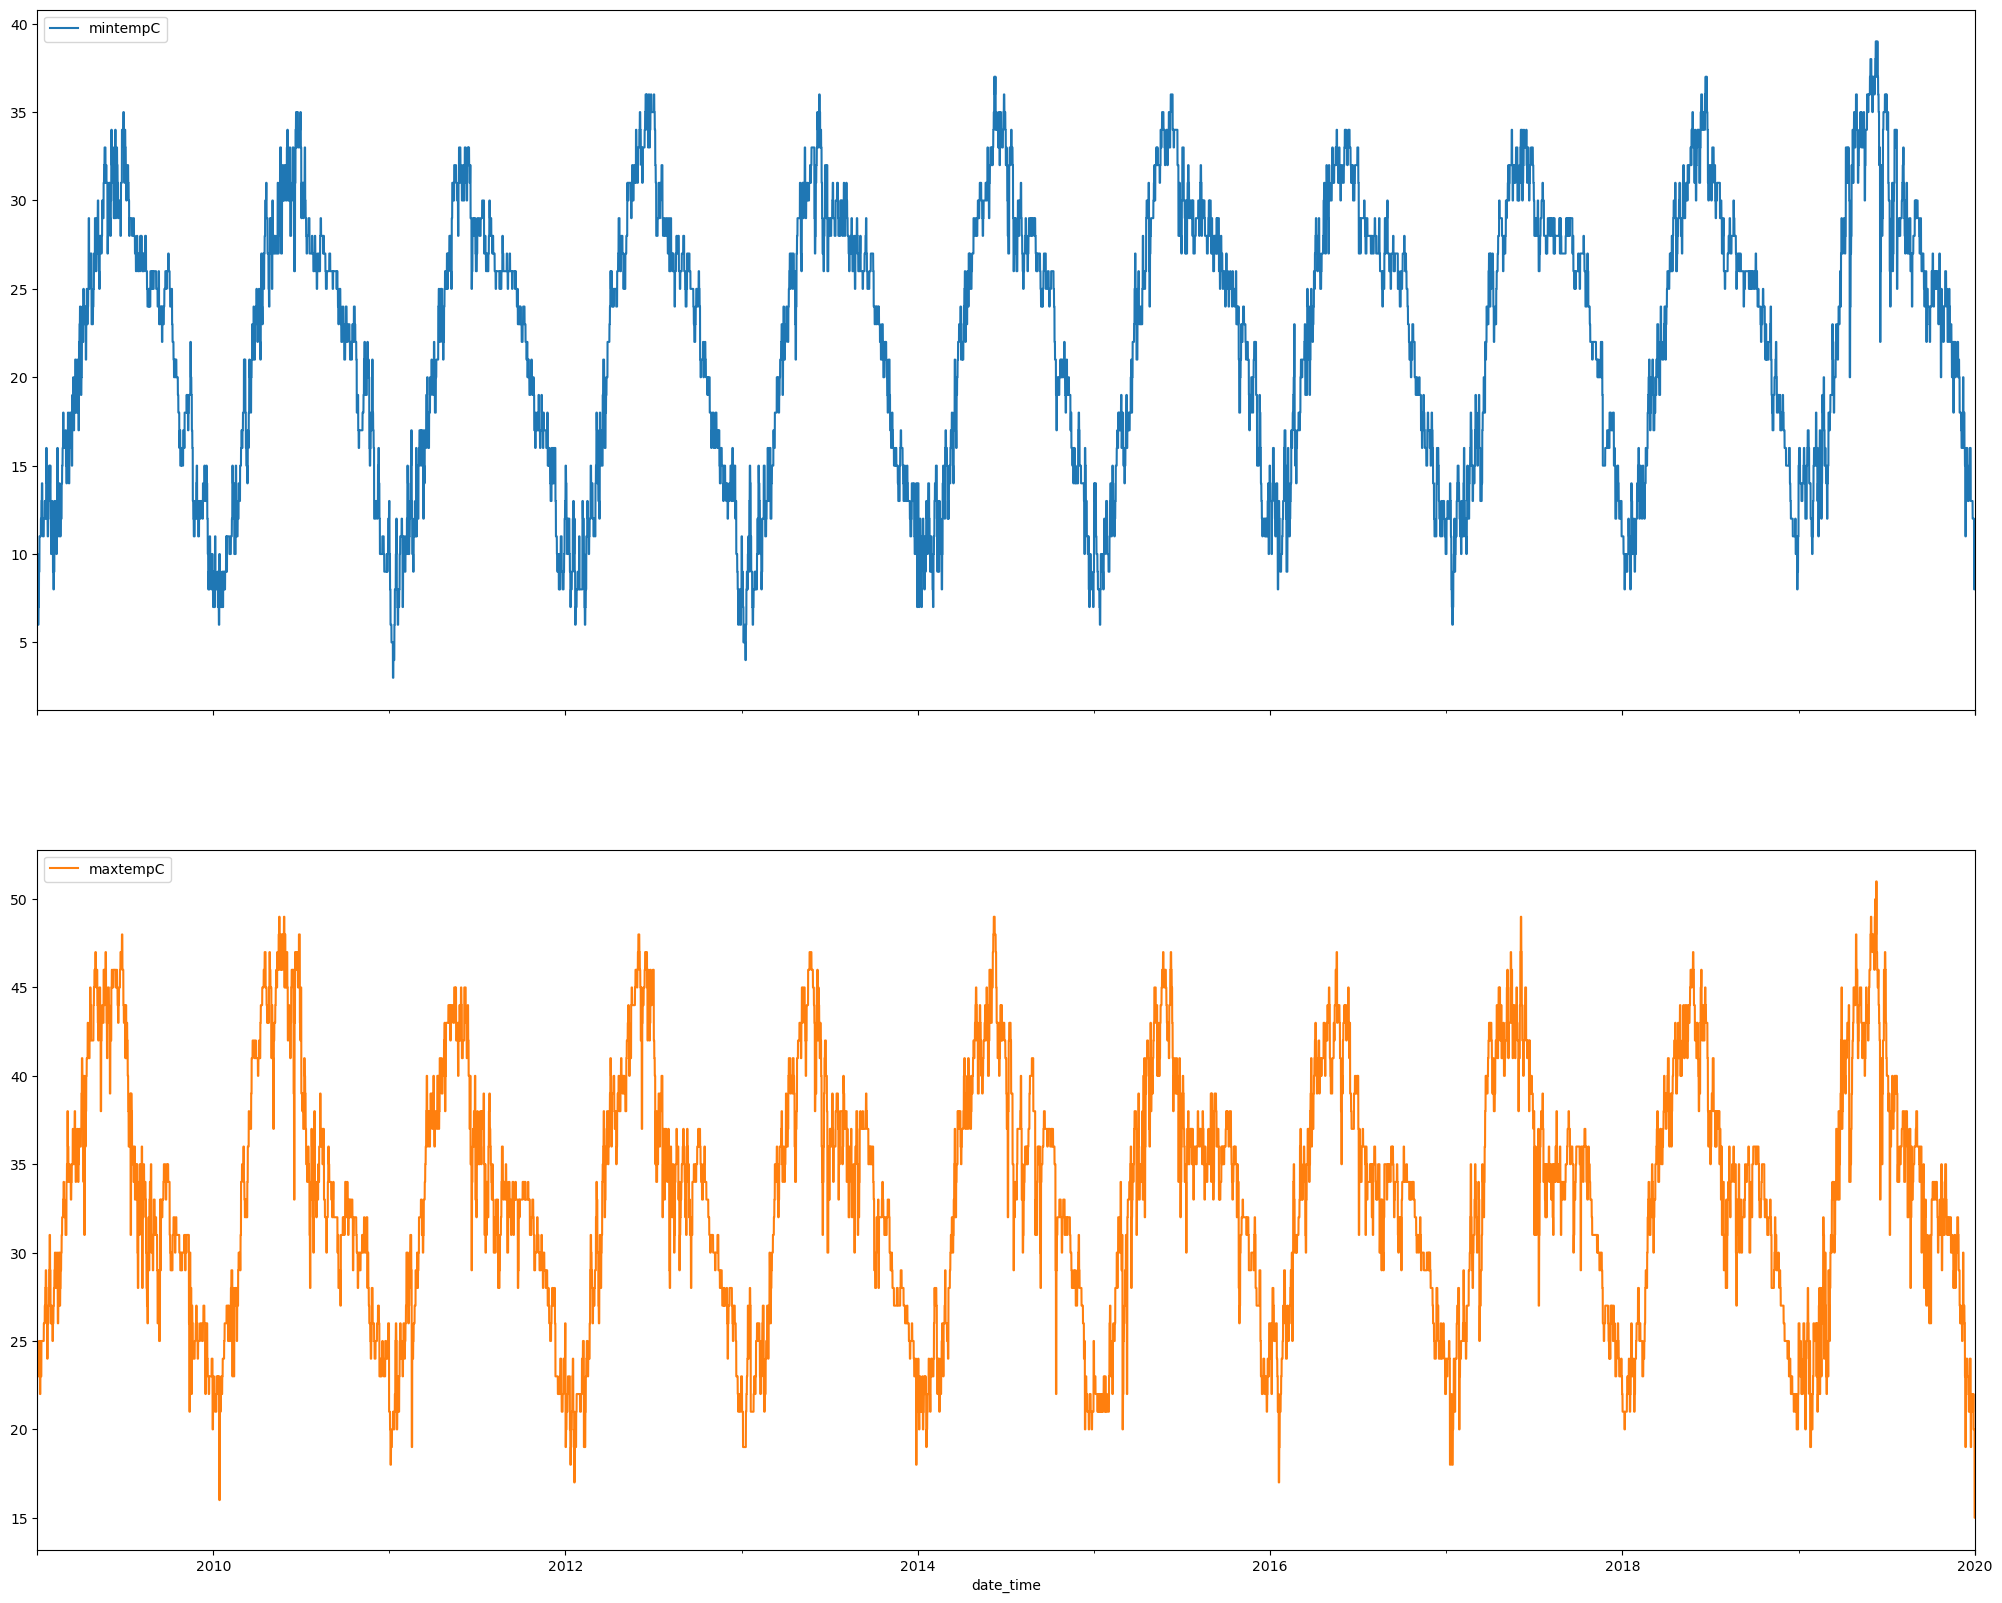

In [18]:
weather_df_num.plot(subplots=True, figsize=(25,20))

In [28]:
weather_df_num.head()

,maxtempC,mintempC
date_time,,
2009-01-01 00:00:00,24,10
2009-01-01 01:00:00,24,10
2009-01-01 02:00:00,24,10
2009-01-01 03:00:00,24,10
2009-01-01 04:00:00,24,10


In [29]:
# Assuming df is your DataFrame with the weather data
def create_lag_features(df, target_column, lags):
    for lag in range(1, lags + 1):
        df[f'{target_column}_lag_{lag}'] = df[target_column].shift(lag)
    return df



In [30]:
# Apply lag features for each weather feature you're predicting
lag_days = 7
for col in ['maxtempC', 'mintempC', 'precipMM', 'windspeedKmph']:
    df = create_lag_features(df, col, lag_days)

df.head()

,date_time,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,...,precipMM_lag_5,precipMM_lag_6,precipMM_lag_7,windspeedKmph_lag_1,windspeedKmph_lag_2,windspeedKmph_lag_3,windspeedKmph_lag_4,windspeedKmph_lag_5,windspeedKmph_lag_6,windspeedKmph_lag_7
0,2009-01-01 00:00:00,24,10,17,50,11,8.7,12,0.0,1015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-01 01:00:00,24,10,11,52,11,8.7,13,0.0,1015,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-01 02:00:00,24,10,6,55,11,8.7,13,0.0,1015,...,NaN,NaN,NaN,11.0,10.0,NaN,NaN,NaN,NaN,NaN
3,2009-01-01 03:00:00,24,10,0,57,10,8.7,13,0.0,1015,...,NaN,NaN,NaN,11.0,11.0,10.0,NaN,NaN,NaN,NaN
4,2009-01-01 04:00:00,24,10,0,54,11,8.7,14,0.0,1016,...,NaN,NaN,NaN,12.0,11.0,11.0,10.0,NaN,NaN,NaN


In [31]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [32]:
df['month'] = df['date_time'].dt.month
df.head()


,date_time,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,...,precipMM_lag_6,precipMM_lag_7,windspeedKmph_lag_1,windspeedKmph_lag_2,windspeedKmph_lag_3,windspeedKmph_lag_4,windspeedKmph_lag_5,windspeedKmph_lag_6,windspeedKmph_lag_7,month
0,2009-01-01 00:00:00,24,10,17,50,11,8.7,12,0.0,1015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2009-01-01 01:00:00,24,10,11,52,11,8.7,13,0.0,1015,...,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2009-01-01 02:00:00,24,10,6,55,11,8.7,13,0.0,1015,...,NaN,NaN,11.0,10.0,NaN,NaN,NaN,NaN,NaN,1
3,2009-01-01 03:00:00,24,10,0,57,10,8.7,13,0.0,1015,...,NaN,NaN,11.0,11.0,10.0,NaN,NaN,NaN,NaN,1
4,2009-01-01 04:00:00,24,10,0,54,11,8.7,14,0.0,1016,...,NaN,NaN,12.0,11.0,11.0,10.0,NaN,NaN,NaN,1


In [33]:
df.dropna(inplace=True)  # Drop rows with NaN values created by lag features
df.head()

,date_time,maxtempC,mintempC,cloudcover,humidity,tempC,sunHour,HeatIndexC,precipMM,pressure,...,precipMM_lag_6,precipMM_lag_7,windspeedKmph_lag_1,windspeedKmph_lag_2,windspeedKmph_lag_3,windspeedKmph_lag_4,windspeedKmph_lag_5,windspeedKmph_lag_6,windspeedKmph_lag_7,month
7,2009-01-01 07:00:00,24,10,0,44,16,8.7,20,0.0,1017,...,0.0,0.0,9.0,10.0,11.0,12.0,11.0,11.0,10.0,1
8,2009-01-01 08:00:00,24,10,0,38,19,8.7,22,0.0,1017,...,0.0,0.0,9.0,9.0,10.0,11.0,12.0,11.0,11.0,1
9,2009-01-01 09:00:00,24,10,0,33,21,8.7,25,0.0,1017,...,0.0,0.0,8.0,9.0,9.0,10.0,11.0,12.0,11.0,1
10,2009-01-01 10:00:00,24,10,1,31,22,8.7,25,0.0,1016,...,0.0,0.0,8.0,8.0,9.0,9.0,10.0,11.0,12.0,1
11,2009-01-01 11:00:00,24,10,2,30,23,8.7,25,0.0,1015,...,0.0,0.0,9.0,8.0,8.0,9.0,9.0,10.0,11.0,1


In [34]:
X = df.drop(columns=['maxtempC', 'mintempC', 'date_time'])
y_max = df['maxtempC']
y_min = df['mintempC']

In [36]:
print(X.shape)
print(y_max.shape)


(96425, 37)
(96425,)


In [37]:
# Train-test split
X_train, X_test, y_max_train, y_max_test = train_test_split(X, y_max, test_size=0.2, random_state=42)
X_train, X_test, y_min_train, y_min_test = train_test_split(X, y_min, test_size=0.2, random_state=42)


In [38]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Random Forest**

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [40]:
# Max temperature prediction
rf_max = RandomForestRegressor()
rf_max.fit(X_train, y_max_train)
y_max_pred = rf_max.predict(X_test[-7:])


In [41]:
rf_max_pred = rf_max.predict(X_test)

In [42]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(rf_max_pred - y_max_test)))

Mean absolute error: 0.09


In [43]:
mae_max_rf = np.mean(np.absolute(rf_max_pred - y_max_test))

In [44]:
# Min temperature prediction
rf_min = RandomForestRegressor()
rf_min.fit(X_train, y_min_train)
y_min_pred = rf_min.predict(X_test[-7:])


In [45]:
rf_min_pred = rf_min.predict(X_test)

In [46]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(rf_min_pred - y_min_test)))

Mean absolute error: 0.08


In [47]:
mae_min_rf = np.mean(np.absolute(rf_min_pred - y_min_test))

In [48]:
last_date = pd.to_datetime('2020-06-01')

In [49]:
print("Weather Forecast for the Next 7 Days:")
for i in range(7):
    prediction_date = last_date + timedelta(days=i+1)
    print(f"Date: {prediction_date.strftime('%Y-%m-%d')} - Max Temp: {y_max_pred[i]:.2f}°C, Min Temp: {y_min_pred[i]:.2f}°C")

Weather Forecast for the Next 7 Days:
Date: 2020-06-02 - Max Temp: 29.01°C, Min Temp: 14.99°C
Date: 2020-06-03 - Max Temp: 37.06°C, Min Temp: 18.00°C
Date: 2020-06-04 - Max Temp: 22.02°C, Min Temp: 9.01°C
Date: 2020-06-05 - Max Temp: 25.00°C, Min Temp: 11.99°C
Date: 2020-06-06 - Max Temp: 25.00°C, Min Temp: 15.00°C
Date: 2020-06-07 - Max Temp: 46.00°C, Min Temp: 27.01°C
Date: 2020-06-08 - Max Temp: 23.99°C, Min Temp: 16.00°C


In [50]:
print(f"Max Temperature Prediction - MAE: {mae_max_rf:.2f}")
print(f"Min Temperature Prediction - MAE: {mae_min_rf:.2f}")

Max Temperature Prediction - MAE: 0.09
Min Temperature Prediction - MAE: 0.08


In [51]:
# Calculate performance metrics
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


In [52]:
# Assuming y_test_max and y_test_min are your actual test target values
mae_max, rmse_max, r2_max = evaluate_metrics(y_max_test, rf_max_pred)
mae_min, rmse_min, r2_min = evaluate_metrics(y_min_test, rf_min_pred)

In [53]:
print("Evalution Matrix for Random Forest Regressor -")
print(f"Max Temperature Prediction - MAE: {mae_max:.2f}, RMSE: {rmse_max:.2f}, R²: {r2_max:.2f}")
print(f"Min Temperature Prediction - MAE: {mae_min:.2f}, RMSE: {rmse_min:.2f}, R²: {r2_min:.2f}")

Evalution Matrix for Random Forest Regressor -
Max Temperature Prediction - MAE: 0.09, RMSE: 0.38, R²: 1.00
Min Temperature Prediction - MAE: 0.08, RMSE: 0.30, R²: 1.00


In [54]:
y_true_rf_max = y_max_test
y_true_rf_min = y_min_test

In [55]:
accuracy_rf_max = 1 - (mae_max / y_true_rf_max.mean())
accuracy_rf_min = 1 - (mae_min / y_true_rf_min.mean())

In [56]:
print(f"Random Forest Model Accuracy for max temperature: {accuracy_rf_max * 100:.2f}%")
print(f"Random Forest Model Accuracy for min temperature: {accuracy_rf_min * 100:.2f}%")

Random Forest Model Accuracy for max temperature: 99.73%
Random Forest Model Accuracy for min temperature: 99.65%


**LSTM**

In [57]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from datetime import timedelta


In [58]:
# Reshape the data for LSTM
X_train_lstm = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = np.reshape(X_test[-7:], (7, 1, X_test.shape[1]))

In [59]:
# Common settings
batch_size = 32
epochs = 50

In [60]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

In [61]:
# Function to build LSTM model
def build_lstm_model():
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(1, X_train.shape[1])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [62]:
# Train the model for max temperature
model_max = build_lstm_model()
model_max.fit(X_train_lstm, y_max_train, batch_size=batch_size, epochs=epochs,
              callbacks=[early_stopping], shuffle=True, verbose=2)
y_max_pred_lstm = model_max.predict(X_test_lstm)


Epoch 1/50
2411/2411 - 10s - 4ms/step - loss: 42.7273
Epoch 2/50
2411/2411 - 6s - 3ms/step - loss: 5.9955
Epoch 3/50
2411/2411 - 6s - 2ms/step - loss: 3.6731
Epoch 4/50
2411/2411 - 5s - 2ms/step - loss: 1.5800
Epoch 5/50
2411/2411 - 6s - 2ms/step - loss: 0.8193
Epoch 6/50
2411/2411 - 5s - 2ms/step - loss: 0.6555
Epoch 7/50
2411/2411 - 7s - 3ms/step - loss: 0.6144
Epoch 8/50
2411/2411 - 7s - 3ms/step - loss: 0.5976
Epoch 9/50
2411/2411 - 6s - 3ms/step - loss: 0.5755
Epoch 10/50
2411/2411 - 6s - 2ms/step - loss: 0.5791
Epoch 11/50
2411/2411 - 5s - 2ms/step - loss: 0.5669
Epoch 12/50
2411/2411 - 5s - 2ms/step - loss: 0.5555
Epoch 13/50
2411/2411 - 7s - 3ms/step - loss: 0.5530
Epoch 14/50
2411/2411 - 8s - 3ms/step - loss: 0.5524
Epoch 15/50
2411/2411 - 5s - 2ms/step - loss: 0.5476
Epoch 16/50
2411/2411 - 6s - 3ms/step - loss: 0.5406
Epoch 17/50
2411/2411 - 7s - 3ms/step - loss: 0.5376
Epoch 18/50
2411/2411 - 6s - 2ms/step - loss: 0.5367
Epoch 19/50
2411/2411 - 8s - 4ms/step - loss: 0.5281


In [63]:
# Train the model for min temperature
model_min = build_lstm_model()
model_min.fit(X_train_lstm, y_min_train, batch_size=batch_size, epochs=epochs,
              callbacks=[early_stopping], shuffle=True, verbose=2)
y_min_pred_lstm = model_min.predict(X_test_lstm)

Epoch 1/50
2411/2411 - 12s - 5ms/step - loss: 20.4524
Epoch 2/50
2411/2411 - 5s - 2ms/step - loss: 2.8468
Epoch 3/50
2411/2411 - 6s - 2ms/step - loss: 1.6625
Epoch 4/50
2411/2411 - 9s - 4ms/step - loss: 0.9259
Epoch 5/50
2411/2411 - 5s - 2ms/step - loss: 0.7090
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 525ms/step


In [64]:
# Display the weather forecast
last_date = pd.to_datetime('2020-06-01')

In [65]:
print("Weather Forecast for the Next 7 Days:")
for i in range(7):
    prediction_date = last_date + timedelta(days=i+1)
    print(f"Date: {prediction_date.strftime('%Y-%m-%d')} - Max Temp: {y_max_pred_lstm[i][0]:.2f}°C, Min Temp: {y_min_pred_lstm[i][0]:.2f}°C")


Weather Forecast for the Next 7 Days:
Date: 2020-06-02 - Max Temp: 28.97°C, Min Temp: 14.47°C
Date: 2020-06-03 - Max Temp: 36.99°C, Min Temp: 18.82°C
Date: 2020-06-04 - Max Temp: 22.14°C, Min Temp: 9.24°C
Date: 2020-06-05 - Max Temp: 25.16°C, Min Temp: 11.68°C
Date: 2020-06-06 - Max Temp: 25.13°C, Min Temp: 15.05°C
Date: 2020-06-07 - Max Temp: 46.06°C, Min Temp: 27.09°C
Date: 2020-06-08 - Max Temp: 24.21°C, Min Temp: 15.99°C


In [66]:
# Calculate performance metrics
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2


In [67]:
y_max_test = y_max_test[-7:]
y_min_test = y_min_test[-7:]


In [68]:
# Assuming y_test_max and y_test_min are your actual test target values
mae_max, rmse_max, r2_max = evaluate_metrics(y_max_test, y_max_pred_lstm)
mae_min, rmse_min, r2_min = evaluate_metrics(y_min_test, y_min_pred_lstm)

In [69]:
print("Evalution Matrix for LSTM -")
print(f"Max Temperature Prediction - MAE: {mae_max:.2f}, RMSE: {rmse_max:.2f}, R²: {r2_max:.2f}")
print(f"Min Temperature Prediction - MAE: {mae_min:.2f}, RMSE: {rmse_min:.2f}, R²: {r2_min:.2f}")

Evalution Matrix for LSTM -
Max Temperature Prediction - MAE: 0.11, RMSE: 0.13, R²: 1.00
Min Temperature Prediction - MAE: 0.29, RMSE: 0.40, R²: 0.99
